In [110]:
import pandas as pd


df = pd.read_csv('agaricus-lepiota.data', header=None)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


First we need to `rename()` the columns we want to use with descriptive names.


In [111]:
df = df.rename(columns={0: 'Poisonous', 5: 'Odor', 1: 'Cap Shape'})
df.head(10)

,Poisonous,Cap Shape,2,3,4,Odor,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Now we need to isolate just these columns into their own data frame. We use `copy()` to avoid `SettingWithCopy` warnings and make sure we aren't inadvertantly chain indexing.


In [112]:
subset = df[['Poisonous', 'Odor', 'Cap Shape']].copy()
subset.head(10)

,Poisonous,Odor,Cap Shape
0,p,p,x
1,e,a,x
2,e,l,b
3,p,p,x
4,e,n,x
5,e,a,x
6,e,a,b
7,e,l,b
8,p,p,x
9,e,a,b


Now we need to replace all of these single letter values with numerical ones so we can better do some statistical analysis later on. For this, I like to use dictionaires and use the `map()` method.


In [113]:
poisonous = {'p': 1, 'e':0}
odor = {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8}
cap_shape = {'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5}


subset['Poisonous'] = subset['Poisonous'].map(poisonous)
subset['Odor'] = subset['Odor'].map(odor)
subset['Cap Shape'] = subset['Cap Shape'].map(cap_shape)
subset.head(10)

,Poisonous,Odor,Cap Shape
0,1,7,2
1,0,0,2
2,0,1,0
3,1,7,2
4,0,6,2
5,0,0,2
6,0,0,0
7,0,1,0
8,1,7,2
9,0,0,0


Now we can plot a histogram, using `hist()`, of our data to show the distribution.


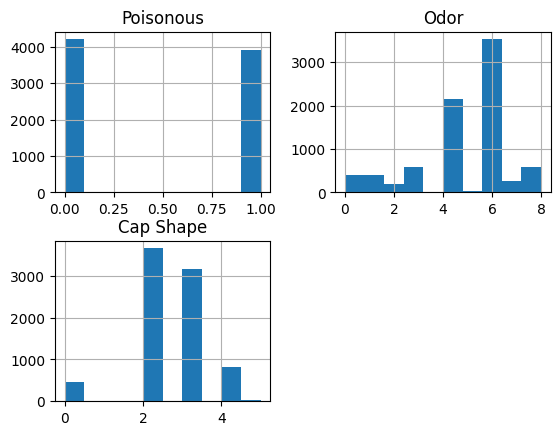

In [114]:
hist = subset.hist()

This is interesting, but it doesn't tell us about how any of the variables relate to each other. Let's try a scatter plot.


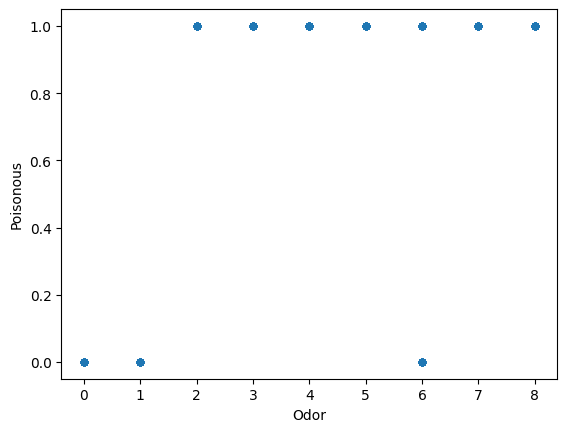

In [115]:
scatter_odor = subset.plot.scatter(x='Odor', y='Poisonous')

As we can see, this doesn't look like a normal scatter plot. This is because, even though numerical, we are working with categorical variables. A sample is either poisonous or not, 1 or 0, there is no inbetween. To get a little bit more of an impactful scatter plot, we can calculate the counts of each category, then set the size of each bubble to this count. We can use `groupby()` and `size()` to collapse the raw rows into a summary table that tells us how many mushrooms fall into each (Odor, Poisonous) combination. We can then do the same thing for the (Cap Shape, Poisonous) combination.


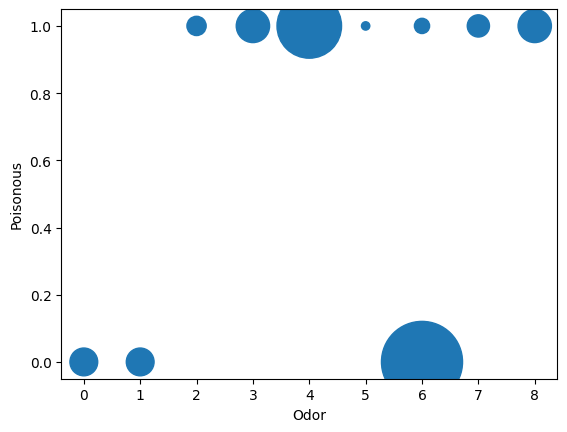

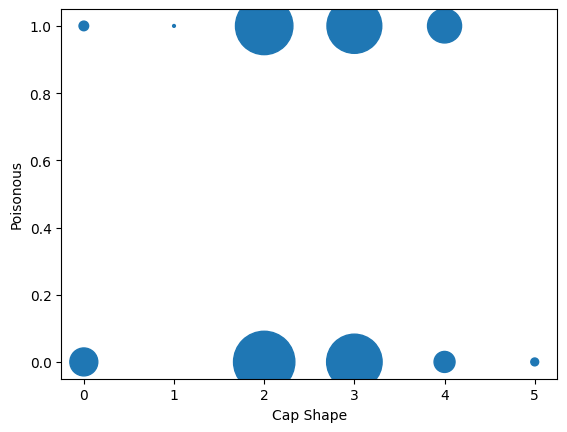

In [116]:
odor_counts = subset.groupby(['Odor', 'Poisonous']).size().reset_index(name='Count')
cap_counts = subset.groupby(['Cap Shape', 'Poisonous']).size().reset_index(name='Count')


scatter_odor = odor_counts.plot.scatter(x='Odor', y='Poisonous', s='Count')
scatter_odor = cap_counts.plot.scatter(x='Cap Shape', y='Poisonous', s='Count')


Based on this very simple explatory analysis, it seems that odor might be a better indicator if a mushroom is edible or poisonous. There are several odors where all of the samples were either poisonous or edible (Like almond and anis, 0 and 1 respectively). While the cap shape does have some of same pattern (all of the sunken (5) caps being edible), much more of the data reflects cap shape being a poor indicator of edibility.
